In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
df = pd.read_csv("train.csv")

In [101]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q


In [102]:
df = df[["Age" , "Fare" , "Survived"]]

In [103]:
df.sample(10)

,Age,Fare,Survived
590,35.0,7.1250,0
721,17.0,7.0542,0
92,46.0,61.1750,0
312,26.0,26.0000,0
159,NaN,69.5500,0
535,7.0,26.2500,1
137,37.0,53.1000,0
4,35.0,8.0500,0
424,18.0,20.2125,0
370,25.0,55.4417,1


In [104]:
df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [105]:
X = df[["Age" , "Fare"]]
Y = df["Survived"]

In [106]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=7)

In [107]:
X_train

,Age,Fare
205,2.0,10.4625
718,NaN,15.5000
835,39.0,83.1583
851,74.0,7.7750
773,NaN,7.2250
...,...,...
579,32.0,7.9250
502,NaN,7.6292
537,30.0,106.4250
196,NaN,7.7500


In [108]:
X_test

,Age,Fare
725,20.00,8.6625
861,21.00,11.5000
528,39.00,7.9250
46,NaN,15.5000
627,21.00,77.9583
...,...,...
809,33.00,53.1000
305,0.92,151.5500
538,NaN,14.5000
825,NaN,6.9500


In [109]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((712, 2), (179, 2), (712,), (179,))

In [110]:
Y_train

205    0
718    0
835    1
851    0
773    0
      ..
579    1
502    0
537    1
196    0
175    0
Name: Survived, Length: 712, dtype: int64

In [111]:
Y_test

725    0
861    0
528    0
46     0
627    1
      ..
809    1
305    1
538    0
825    0
874    1
Name: Survived, Length: 179, dtype: int64

In [112]:
X_train["Age_Imputed"] = X_train["Age"]

In [113]:
X_test["Age_Imputed"] = X_train["Age"] 

In [114]:
X_train.loc[X_train["Age_Imputed"].isnull(), "Age_Imputed"] = X_train["Age"].dropna().sample(X_train["Age_Imputed"].isnull().sum(), replace=True, random_state=42
).values

X_test.loc[X_test["Age_Imputed"].isnull(), "Age_Imputed"] = X_test["Age"].dropna().sample(
    X_test["Age_Imputed"].isnull().sum(), replace=True, random_state=42
).values


In [115]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


array([19.  , 32.  , 40.  , 25.  , 29.  , 48.  ,  0.42, 28.  , 52.  ,
       34.  , 28.  ,  3.  , 35.  , 66.  , 48.  , 35.  ,  4.  , 34.  ,
       27.  , 33.  , 42.  , 20.  , 33.  , 19.  , 20.  , 16.  , 16.  ,
       24.  , 36.  , 36.  ,  0.83, 52.  , 29.  , 23.  , 21.  , 47.  ,
       23.  , 45.  , 35.  , 49.  , 65.  , 29.  , 30.  , 35.  , 36.  ,
        0.67, 34.  , 31.  , 60.  , 58.  , 29.  , 31.  , 16.  , 18.  ,
       71.  , 11.  , 22.  , 21.  , 23.  , 58.  ,  2.  , 17.  , 14.  ,
       27.  , 36.  , 18.  , 35.  , 20.  , 26.  , 17.  , 24.  , 19.  ,
       19.  , 36.  , 14.  , 34.  , 34.  , 19.  , 17.  , 15.  , 19.  ,
       47.  , 16.  ,  2.  , 48.  , 44.  , 32.  , 20.  , 36.  , 44.  ,
       28.  ,  3.  ,  1.  , 18.  , 14.  , 24.  , 28.  , 33.  , 54.  ,
       48.  , 29.  , 19.  , 36.  , 27.  , 32.  , 32.  , 43.  , 48.  ,
       27.  , 40.  , 18.  , 26.  , 25.  , 45.  , 25.  , 24.  , 16.  ,
       29.  , 20.  , 19.  , 64.  , 44.  , 42.  , 28.  , 17.  , 74.  ,
       20.  , 36.  ,

In [116]:
X_train["Age_Imputed"].isnull().sum()

np.int64(0)

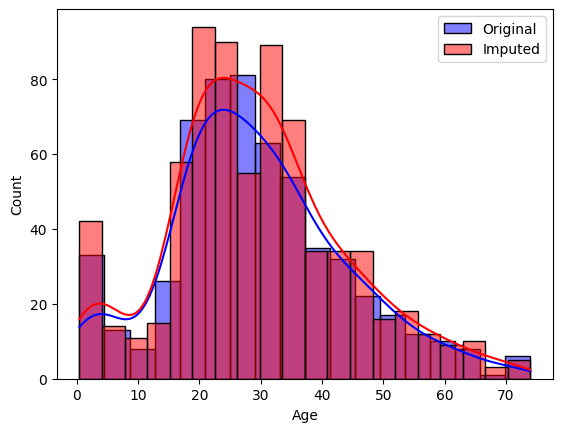

In [136]:
sns.histplot(X_train['Age'], label='Original', kde=True, color='blue', alpha=0.5)
sns.histplot(X_train['Age_Imputed'], label='Imputed', kde=True, color='red', alpha=0.5)

plt.legend()
plt.show()


In [127]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_Imputed'].var())

Original variable variance:  206.7575461859834
Variance after random imputation:  209.07127652459744


In [139]:
X_train[['Fare', 'Age', 'Age_Imputed']].cov()


,Fare,Age,Age_Imputed
Fare,2770.714219,86.130285,82.756847
Age,86.130285,206.757546,206.757546
Age_Imputed,82.756847,206.757546,209.071277


<Axes: >

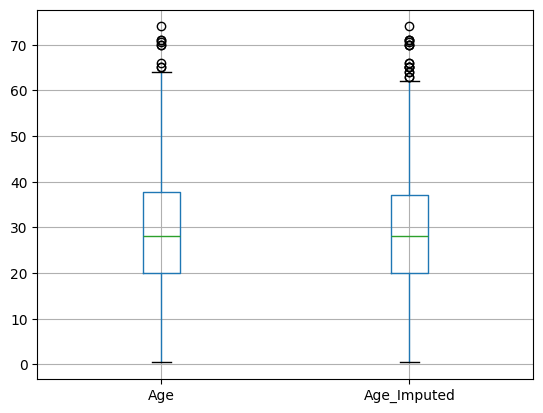

In [142]:
X_train[["Age" , "Age_Imputed"]].boxplot()

In [144]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))


NameError: name 'observation' is not defined

In [146]:
DF=pd.read_csv("house-train.csv" , usecols=["FireplaceQu" , "GarageQual" , "SalePrice"] )

In [151]:
DF.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [153]:
DF.sample(10)

,FireplaceQu,GarageQual,SalePrice
987,Gd,TA,395192
999,NaN,TA,206000
37,TA,TA,153000
177,Gd,TA,172500
274,NaN,TA,124500
1412,NaN,TA,90000
318,TA,TA,260000
69,TA,TA,225000
1054,Gd,TA,255000
324,Gd,TA,242000


In [156]:
X=DF.iloc[:,0:2]
Y=DF["SalePrice"]

In [158]:
X

,FireplaceQu,GarageQual
0,NaN,TA
1,TA,TA
2,TA,TA
3,Gd,TA
4,TA,TA
...,...,...
1455,TA,TA
1456,TA,TA
1457,Gd,TA
1458,NaN,TA


In [160]:
Y


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [163]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [170]:
x_train , y_train

(     FireplaceQu GarageQual
 254          NaN         TA
 1066          TA         TA
 638          NaN        NaN
 799           TA         TA
 380           Gd         TA
 ...          ...        ...
 1095          Gd         TA
 1130          TA         TA
 1294         NaN         TA
 860           Gd         TA
 1126          TA         TA
 
 [1168 rows x 2 columns],
 254     145000
 1066    178000
 638      85000
 799     175000
 380     127000
          ...  
 1095    176432
 1130    135000
 1294    115000
 860     189950
 1126    174000
 Name: SalePrice, Length: 1168, dtype: int64)

In [172]:
x_train["FireplaceQu_imputed"] = x_train["FireplaceQu"]
x_test["FireplaceQu_imputed"] = x_test["FireplaceQu"]

In [174]:
x_train["GarageQual_imputed"] = x_train["GarageQual"]
x_test["GarageQual_imputed"] = x_test["GarageQual"]

In [177]:
x_train.sample(10)

,FireplaceQu,GarageQual,FireplaceQu_imputed,GarageQual_imputed
632,TA,TA,TA,TA
719,Po,TA,Po,TA
1439,TA,TA,TA,TA
609,NaN,TA,NaN,TA
336,Gd,TA,Gd,TA
701,NaN,TA,NaN,TA
379,TA,TA,TA,TA
176,TA,TA,TA,TA
210,NaN,NaN,NaN,NaN
102,NaN,TA,NaN,TA


In [198]:
# Impute missing Age values in X_train
missing_age_train = X_train["Age_Imputed"].isnull().sum()
X_train.loc[X_train["Age_Imputed"].isnull(), "Age_Imputed"] = (
    X_train["Age"].dropna().sample(n=missing_age_train, replace=True, random_state=42).values
)

# Impute missing Age values in X_test
missing_age_test = X_test["Age_Imputed"].isnull().sum()
X_test.loc[X_test["Age_Imputed"].isnull(), "Age_Imputed"] = (
    X_test["Age"].dropna().sample(n=missing_age_test, replace=True, random_state=42).values
)
